In [1]:
class ChickenBreast:  
    
    def __init__(self, num, brand, name, calories, carbs, protein, fat):
        self._num = num
        self._brand = brand
        self._name = name
        self._calories = calories
        self._carbs = carbs
        self._protein = protein
        self._fat = fat
        self._total = 0
        
    @property
    def num(self):
        return self._num
    
    @property
    def brand(self):
        return self._brand
    
    @property
    def name(self):
        return self._name
    
    @property
    def calories(self):
        return self._calories
    
    @property
    def carbs(self):
        return self._carbs
    
    @property
    def protein(self):
        return self._protein
    
    @property
    def fat(self):
        return self._fat

In [2]:
class ChickenBreastAnalysis:
    
    _product1 = []
    _product2 = []
    _number = 0
    _carbs_avg = 0
    _protein_avg = 0
    _fat_avg = 0
    _carbs_total = 0
    _protein_total = 0
    _fat_total = 0

    def __init__(self):
        pass

    def register_product(self, ChickenBreast):
        ChickenBreastAnalysis._product1.append(ChickenBreast)
        ChickenBreastAnalysis._number += 1
        ChickenBreastAnalysis._carbs_total += ChickenBreast.carbs
        ChickenBreastAnalysis._protein_total += ChickenBreast.protein
        ChickenBreastAnalysis._fat_total += ChickenBreast.fat

    def process(self):
        self.calculate_carbs_avg()
        self.calculate_protein_avg()
        self.calculate_fat_avg()

    @property
    def number(self):
        return self._number
   
    def calculate_carbs_avg(self):
        self._carbs_avg = self._carbs_total / self._number

    def calculate_protein_avg(self):
        self._protein_avg = self._protein_total / self._number

    def calculate_fat_avg(self):
        self._fat_avg = self._fat_total / self._number

    def Print_Products_Average(self):
        print("Best40 제품의 탄수화물 평균 : {:.2f}\nBest40 제품의 단백질 평균 : {:.2f}\nBest40 제품의 지방 평균 : {:.2f}"
              .format(self._carbs_avg, self._protein_avg, self._fat_avg))


In [3]:
class WrongProductRecord(Exception):
    def __init__(self, msg):
        self._message = msg

def check_parameter():
    try:
        main()
    except TypeError:
        raise WrongProductRecord("품번, 브랜드, 상품명, 열량, 탄수화물, 단백질, 지방을 입력해주세요")
    except ValueError:
        raise WrongProductRecord("정수를 입력해주세요")

In [4]:
def checkTime(func):
    import time
    
    def newFunc(*args, **kwargs):
        start = time.time()
        func(*args, **kwargs)
        end = time.time()
        print("\n실행시간 : ", end - start, "초")
    return newFunc

@checkTime
def main():
    data = open("data.txt","r", encoding = "utf-8")

    a = []
    for lines in data:
        para = lines.split()
        para1 = int(para[0])
        para2 = para[1]
        para3 = para[2]
        para4 = float(para[3])
        para5 = float(para[4])
        para6 = float(para[5])
        para7 = float(para[6])

        temp = ChickenBreast(para1,para2,para3,para4,para5,para6,para7)
        a.append(temp)

    b = ChickenBreastAnalysis()
    
    for i in a:
        if(i.num < 0 or i.num >40):
            raise WrongProductRecord("{}의 품번 입력오류".format(i.name))
        if (i.calories < 0):
            raise WrongProductRecord("{}의 열량 입력오류".format(i.name))
        if (i.carbs < 0):
            raise WrongProductRecord("{}의 탄수화물 입력오류".format(i.name))
        if (i.protein < 0):
            raise WrongProductRecord("{}의 단백질 입력오류".format(i.name))
        if (i.fat < 0):
            raise WrongProductRecord("{}의 지방 입력오류".format(i.name))

        b.register_product(i)

    b.process()
    b.Print_Products_Average()
    
    import matplotlib.pyplot as plt
    import matplotlib
    
    subject = ["carbs","protein","fat"]
    value = [b._carbs_avg, b._protein_avg, b._fat_avg]
    xs = [j + 5 for j, _ in enumerate(subject)]
    plt.bar(xs,value)
    plt.ylabel("serving size 100g")
    plt.title("Average nutrition facts")
    plt.xticks([j+ 5 for j, _ in enumerate(subject)],subject)
    plt.show()

In [5]:
%%writefile data.txt
1 맛있닭 닭가슴살스테이크 142.28 8.17 22.45 2.2 
2 잇메이트 훈제닭가슴살 117.8 0.97 24.52 1.76
3 러브잇 닭가슴살스테이크 124 7 20 1.7
4 러브잇 훈제슬라이스닭가슴살 137.55 0.37 29.72 1.91
5 치품닭 닭가슴살스테이크 180.49 9.5 22.61 7.09
6 잇메이트 토마토로제맛닭가슴살 180.2 8.8 30.5 2.6
7 맛있닭 프로틴훈제닭가슴살 175.4 2.9 31.5 4.2
8 잇메이트 닭가슴살스테이크 152.4 11.9 20.24 4 
9 햇살닭 저염훈제닭가슴살 130.2 0 28 2 
10 푸드원 훈제닭가슴살 119 0.3 26.97 1.08 
11 잇메이트 훈제닭가슴살소시지 112 3 20 2 
12 맛있닭 닭가슴살볼 152.66 8.76 20.75 4.98 
13 베스틱 훈제닭가슴살소시지 114.63 0.18 24.99 1.55 
14 맛있닭 현미닭가슴살소시지 145 6 20 4.5 
15 맛있닭 마늘닭가슴살큐브 129.77 1.13 27.6 1.65
16 맛있닭 고추닭가슴살큐브 142.18 0 27.06 3.7 
17 맛있닭 닭가슴살햄 140 3 19 6 
18 잇메이트 스팀닭가슴살 135 4.1 23.6 2.3 
19 잇메이트 갈릭스팀닭가슴살 134 3.9 23.1 1.9 
20 맛있닭 고추맛스팀닭가슴살 165 4 26 4.7 
21 러브잇 소프트닭가슴살 111.41 0.74 25.29 0.81 
22 맛있닭 고추맛닭가슴살 110 3 23 0.5 
23 맛있닭 탄두리맛닭가슴살 110 3 24 0.9 
24 햇살닭 페퍼콘스팀닭가슴살 125 2 26 1.5
25 리얼원 바질올리브닭가슴살 125 2 23 2.3
26 리얼원 하바네로닭가슴살 130 1 25 2.6
27 바디나인 마늘맛닭가슴살 125 2 23 2.9
28 바디나인 바질페스토닭가슴살 132 2 26 2.4
29 올핏 소프트스팀닭가슴살 124 0 27 1.7
30 올핏 저염스팀닭가슴살 130.2 1.7 26.8 1.8
31 신선애 생닭가슴살 102 0 23.3 0
32 닭스몰 친환경생닭가슴살 109 0 23.1 1.2
33 맛있닭 호박맛닭가슴살스테이크 144.95 8.4 21.2 3
34 맛있닭 닭가슴살야채스테이크 141.4 8.63 17.45 4.12
35 잇메이트 저염훈제닭가슴살 123 0.17 27.58 1.38
36 잇메이트 할라피뇨맛훈제닭가슴살 116.43 0.86 25.84 1.07
37 러브잇 마늘맛닭가슴살 131.68 0.23 29.72 1.52 
38 러브잇 메스퀴트맛닭가슴살 133.7 0.24 30.07 1.38 
39 러브잇 윈저그라맛닭가슴살 117.9 0.61 36.12 1.22
40 러브잇 탄두리맛닭가슴살 124.58 0.21 28.01 1.3

Overwriting data.txt


Best40 제품의 탄수화물 평균 : 3.02
Best40 제품의 단백질 평균 : 25.00
Best40 제품의 지방 평균 : 2.39


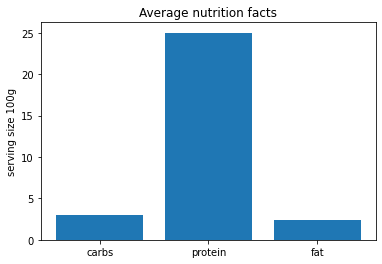


실행시간 :  2.928706645965576 초


In [6]:
if __name__ == '__main__':
    try:
        check_parameter()
    except WrongProductRecord as e:
        print(e.args[0])

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv', sep=',', index_col='num')
data.columns.names = ['product info']
data

product info,brand,name,calories,carbs,protein,fat
num,,,,,,
1,맛있닭,닭가슴살스테이크,142.28,8.17,22.45,2.20
2,잇메이트,훈제닭가슴살,117.80,0.97,24.52,1.76
3,러브잇,닭가슴살스테이크,124.00,7.00,20.00,1.70
4,러브잇,훈제슬라이스닭가슴살,137.55,0.37,29.72,1.91
5,치품닭,닭가슴살스테이크,180.49,9.50,22.61,7.09
6,잇메이트,토마토로제맛닭가슴살,180.20,8.80,30.50,2.60
7,맛있닭,프로틴닭가슴살훈제맛,175.40,2.90,31.50,4.20
8,잇메이트,닭가슴살스테이크,152.40,11.90,20.24,4.00
9,햇살닭,저염훈제닭가슴살,130.20,0.00,28.00,2.00


In [8]:
brand_data = data.brand
brand_freq = brand_data.value_counts()
brand_freq

 맛있닭     12
 러브잇      7
 잇메이트     7
 올핏       2
 바디나인     2
 리얼원      2
 햇살닭      2
잇메이트      1
 치품닭      1
 베스틱      1
 신선애      1
 푸드원      1
 닭스몰      1
Name: brand, dtype: int64

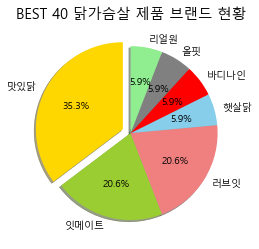

In [9]:
from matplotlib import font_manager, rc
from matplotlib import style

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

colors = ['gold', 'yellowgreen', 'lightcoral', 'skyblue', 'red', 'grey', 'lightgreen']
labels = ['맛있닭', '잇메이트', '러브잇', '햇살닭', '바디나인', '올핏', '리얼원']
ratio = [12, 7, 7, 2, 2, 2, 2]
explode = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
plt.pie(ratio, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("BEST 40 닭가슴살 제품 브랜드 현황")
plt.show()

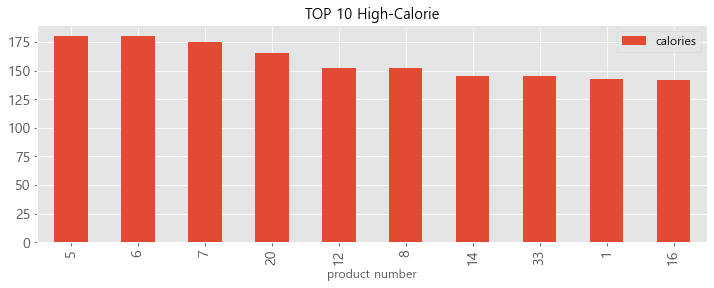

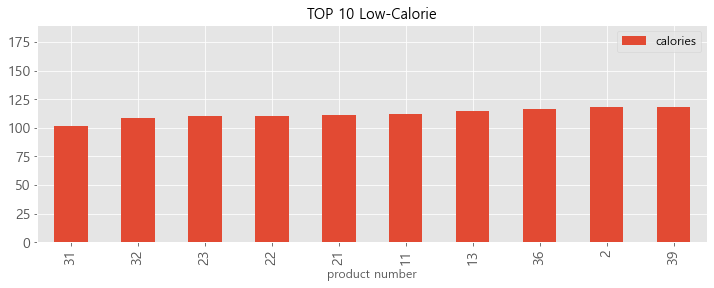

In [10]:
new_data = data.reindex(columns=['brand', 'name', 'calories'])
high_cal = new_data.sort_values('calories', ascending=False)
low_cal = new_data.sort_values('calories', ascending = True)
dt1 = high_cal.head(10)
dt2 = low_cal.head(10)

ax = dt1.plot(kind='bar', title='TOP 10 High-Calorie', figsize = (12, 4), legend = True, fontsize = 14)
ax.set_xlabel('product number', fontsize = 12)
ax.set_ylim([0,190])
ax.legend(['calories'], fontsize=12)
plt.show()

bx = dt2.plot(kind='bar', title='TOP 10 Low-Calorie', figsize = (12, 4), legend = True, fontsize = 14)
bx.set_xlabel('product number', fontsize = 12)
bx.set_ylim([0,190])
bx.legend(['calories'], fontsize=12)
plt.show()

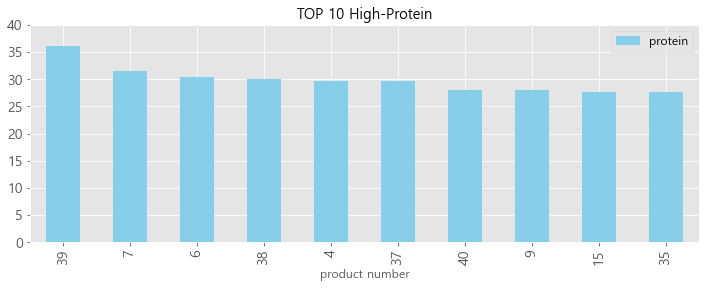

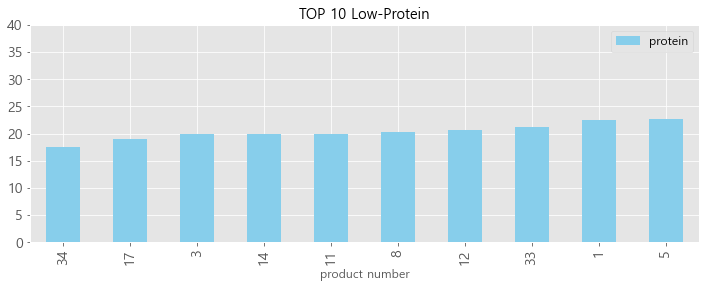

In [11]:
new_data = data.reindex(columns=['brand', 'name', 'protein'])
high_protein = new_data.sort_values('protein', ascending=False)
low_protein = new_data.sort_values('protein', ascending = True)
dt3 = high_protein.head(10)
dt4 = low_protein.head(10)

cx = dt3.plot(kind='bar', title='TOP 10 High-Protein', figsize = (12, 4), legend = True, fontsize = 14, color = 'skyblue')
cx.set_xlabel('product number', fontsize = 12)
cx.set_ylim([0,40])
cx.legend(['protein'], fontsize=12)
plt.show()

dx = dt4.plot(kind='bar', title='TOP 10 Low-Protein', figsize = (12, 4), legend = True, fontsize = 14, color = 'skyblue')
dx.set_xlabel('product number', fontsize = 12)
dx.set_ylim([0,40])
dx.legend(['protein'], fontsize=12)
plt.show()

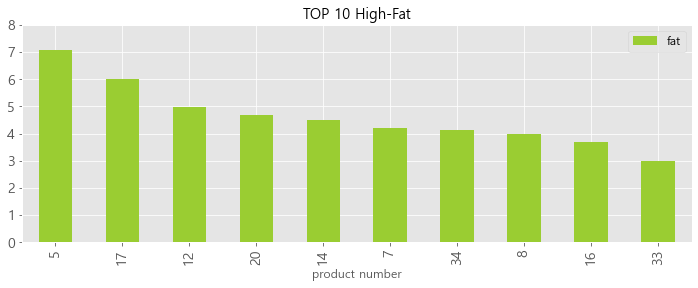

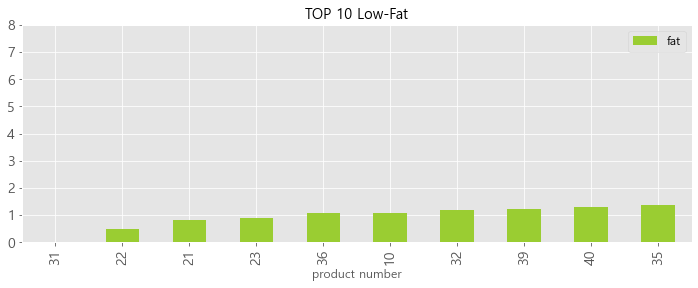

In [12]:
new_data = data.reindex(columns=['brand', 'name', 'fat'])
high_fat = new_data.sort_values('fat', ascending = False)
low_fat = new_data.sort_values('fat', ascending = True)
dt5 = high_fat.head(10)
dt6 = low_fat.head(10)

ex = dt5.plot(kind='bar', title='TOP 10 High-Fat', figsize = (12, 4), legend = True, fontsize = 14, color = 'yellowgreen')
ex.set_xlabel('product number', fontsize = 12)
ex.set_ylim([0,8])
ex.legend(['fat'], fontsize=12)
plt.show()

fx = dt6.plot(kind='bar', title='TOP 10 Low-Fat', figsize = (12, 4), legend = True, fontsize = 14, color = 'yellowgreen')
fx.set_xlabel('product number', fontsize = 12)
fx.set_ylim([0,8])
fx.legend(['fat'], fontsize=12)
plt.show()

In [13]:
myPick1 = dt2.reindex(columns=['brand', 'name', 'calories'])
myPick1

product info,brand,name,calories
num,,,
31,신선애,생닭가슴살,102.00
32,닭스몰,친환경생닭가슴살,109.00
23,맛있닭,탄두리맛소프트닭가슴살,110.00
22,맛있닭,고추맛소프트닭가슴살,110.00
21,러브잇,소프트닭가슴살,111.41
11,잇메이트,훈제맛닭가슴살소시지,112.00
13,베스틱,훈제맛닭가슴살소시지,114.63
36,잇메이트,할라피뇨맛훈제닭가슴살,116.43
2,잇메이트,훈제닭가슴살,117.80


In [14]:
myPick2 = dt3.reindex(columns=['brand', 'name', 'protein'])
myPick2

product info,brand,name,protein
num,,,
39,러브잇,윈저그라맛닭가슴살,36.12
7,맛있닭,프로틴닭가슴살훈제맛,31.50
6,잇메이트,토마토로제맛닭가슴살,30.50
38,러브잇,메스퀴트맛닭가슴살,30.07
4,러브잇,훈제슬라이스닭가슴살,29.72
37,러브잇,담백한마늘맛닭가슴살,29.72
40,러브잇,탄두리맛닭가슴살,28.01
9,햇살닭,저염훈제닭가슴살,28.00
15,맛있닭,마늘맛닭가슴살큐브,27.60


In [15]:
myPick3 = dt6.reindex(columns=['brand', 'name', 'fat'])
myPick3

product info,brand,name,fat
num,,,
31,신선애,생닭가슴살,0.00
22,맛있닭,고추맛소프트닭가슴살,0.50
21,러브잇,소프트닭가슴살,0.81
23,맛있닭,탄두리맛소프트닭가슴살,0.90
36,잇메이트,할라피뇨맛훈제닭가슴살,1.07
10,푸드원,훈제닭가슴살,1.08
32,닭스몰,친환경생닭가슴살,1.20
39,러브잇,윈저그라맛닭가슴살,1.22
40,러브잇,탄두리맛닭가슴살,1.30
